<a href="https://colab.research.google.com/github/aerionator/Water-Quality-Potability/blob/main/Fix_Water_Quality_and_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Water Quality and Potability Case-study

### This dataset is valuable for water quality assessment, water treatment planning, and ensuring the safety of drinking water supplies. It can be utilized by water treatment plants, environmental agencies, and researchers to make data-driven decisions regarding water quality and potability.


# Required libraries

In [4]:
# Menginstal libraries yang diperlukan
%pip install tensorflow
%pip install keras
%pip install scikeras[tensorflow]      # gpu compute platform
%pip install scikeras[tensorflow-cpu]  # cpu

     ------------------------------------ 284.1/284.1 MB 732.5 kB/s eta 0:00:00
     ------------------------------------ 130.2/130.2 kB 547.7 kB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 749.7 kB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 430.5/430.5 kB 927.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 53.0/53.0 kB 1.4 MB/s eta 0:00:00
     ------------------------------------ 440.7/440.7 kB 982.7 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 916.3 kB/s eta 0:00:00
     ---------------------------------------- 


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using c

ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


# Loading Data

In [7]:
df_water_quality = pd.read_csv('water_potability.csv')

# Data Wrangling

In [8]:
df_water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df_water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df_water_quality.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df_water_quality.shape

(3276, 10)

In [12]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputed_values = imputer.fit_transform(df_water_quality)

In [13]:
df_water_quality_imputed = pd.DataFrame(columns = list(df_water_quality.columns), data = imputed_values)

In [14]:
df_water_quality_imputed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [15]:
df_water_quality_imputed.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploratory Data Analysis

<Axes: >

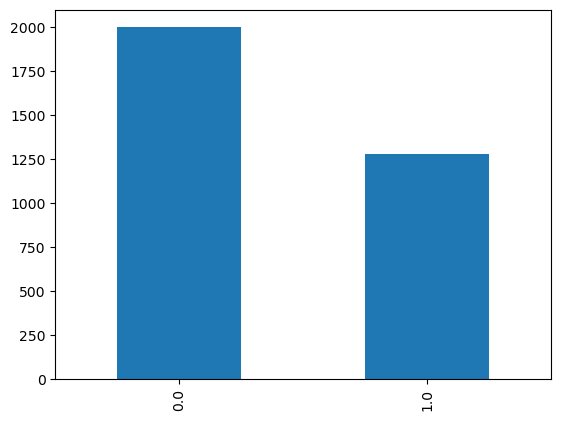

In [16]:
df_water_quality_imputed['Potability'].value_counts().plot(kind = 'bar')

## Data Normalization

In [17]:
min_ratio = df_water_quality_imputed['Potability'].value_counts().min()

In [18]:
df_water_quality_imputed_0 = df_water_quality_imputed[df_water_quality_imputed['Potability'] == 0].sample(min_ratio, replace = True)
df_water_quality_imputed_1 = df_water_quality_imputed[df_water_quality_imputed['Potability'] == 1]
df_water_quality_imputed_balanced = pd.concat([df_water_quality_imputed_0, df_water_quality_imputed_1])

<Axes: >

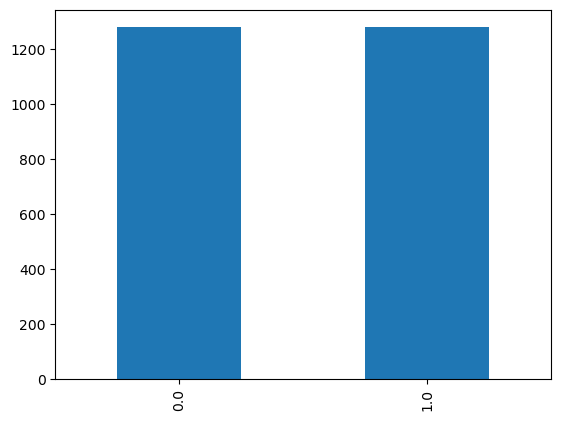

In [19]:
df_water_quality_imputed_balanced['Potability'].value_counts().plot(kind = 'bar')

<Axes: >

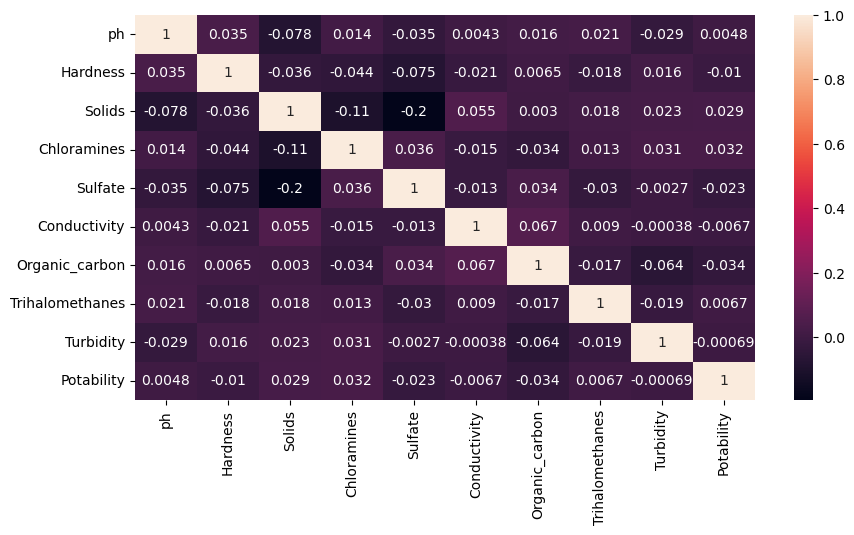

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df_water_quality_imputed_balanced.corr(), annot = True)

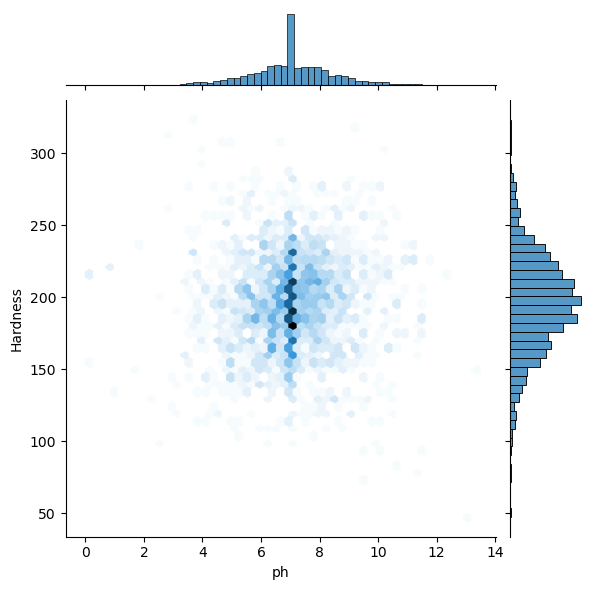

In [21]:
sns.jointplot(x = 'ph', y = 'Hardness', data = df_water_quality_imputed_balanced, kind = "hex")

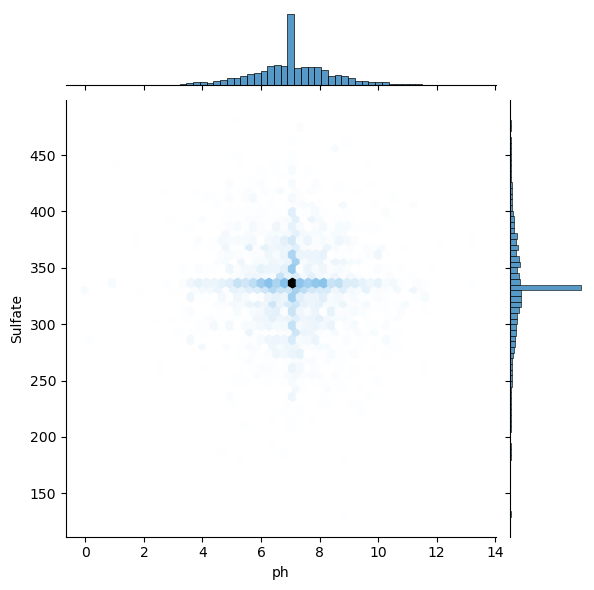

In [22]:
sns.jointplot(x = 'ph', y = 'Sulfate', data = df_water_quality_imputed_balanced, kind = "hex")

In [ ]:
sns.scatterplot(x = 'Organic_carbon', y = 'ph', data = df_water_quality_imputed_balanced, hue = 'Potability'  )

# Data Preprocessing

In [ ]:
scaler = MinMaxScaler()
df_scaled_vales = scaler.fit_transform(df_water_quality_imputed_balanced)
df_water_quality_scaled = pd.DataFrame(columns = list(df_water_quality.columns), data = df_scaled_vales)

In [ ]:
df_water_quality_scaled.head()

In [ ]:
X = df_water_quality_scaled.drop('Potability', axis = 1)
y = df_water_quality_scaled['Potability']

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Modeling

In [ ]:
Ann_model = Sequential([
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
Ann_model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['Accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 7)

In [ ]:
Ann_history = Ann_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, callbacks = [early_stopping])

In [ ]:
plt.plot(Ann_history.history['loss'])
plt.plot(Ann_history.history['val_loss'])

In [ ]:
plt.plot(Ann_history.history['Accuracy'])
plt.plot(Ann_history.history['val_Accuracy'])

In [ ]:
Ann_model.evaluate(X_test, y_test)